# KNN for Diabetes

Predict if a person gets infected by diabetes

Use the Diabetes dataset

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read dataset

In [45]:
diabetes = pd.read_csv("./data/diabetes.csv")

In [46]:
diabetes.shape

(768, 9)

In [47]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [48]:
diabetes.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [49]:
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
diabetes.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [51]:
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

#### **Visualization**

##### **Pairplot**

<Figure size 720x504 with 0 Axes>

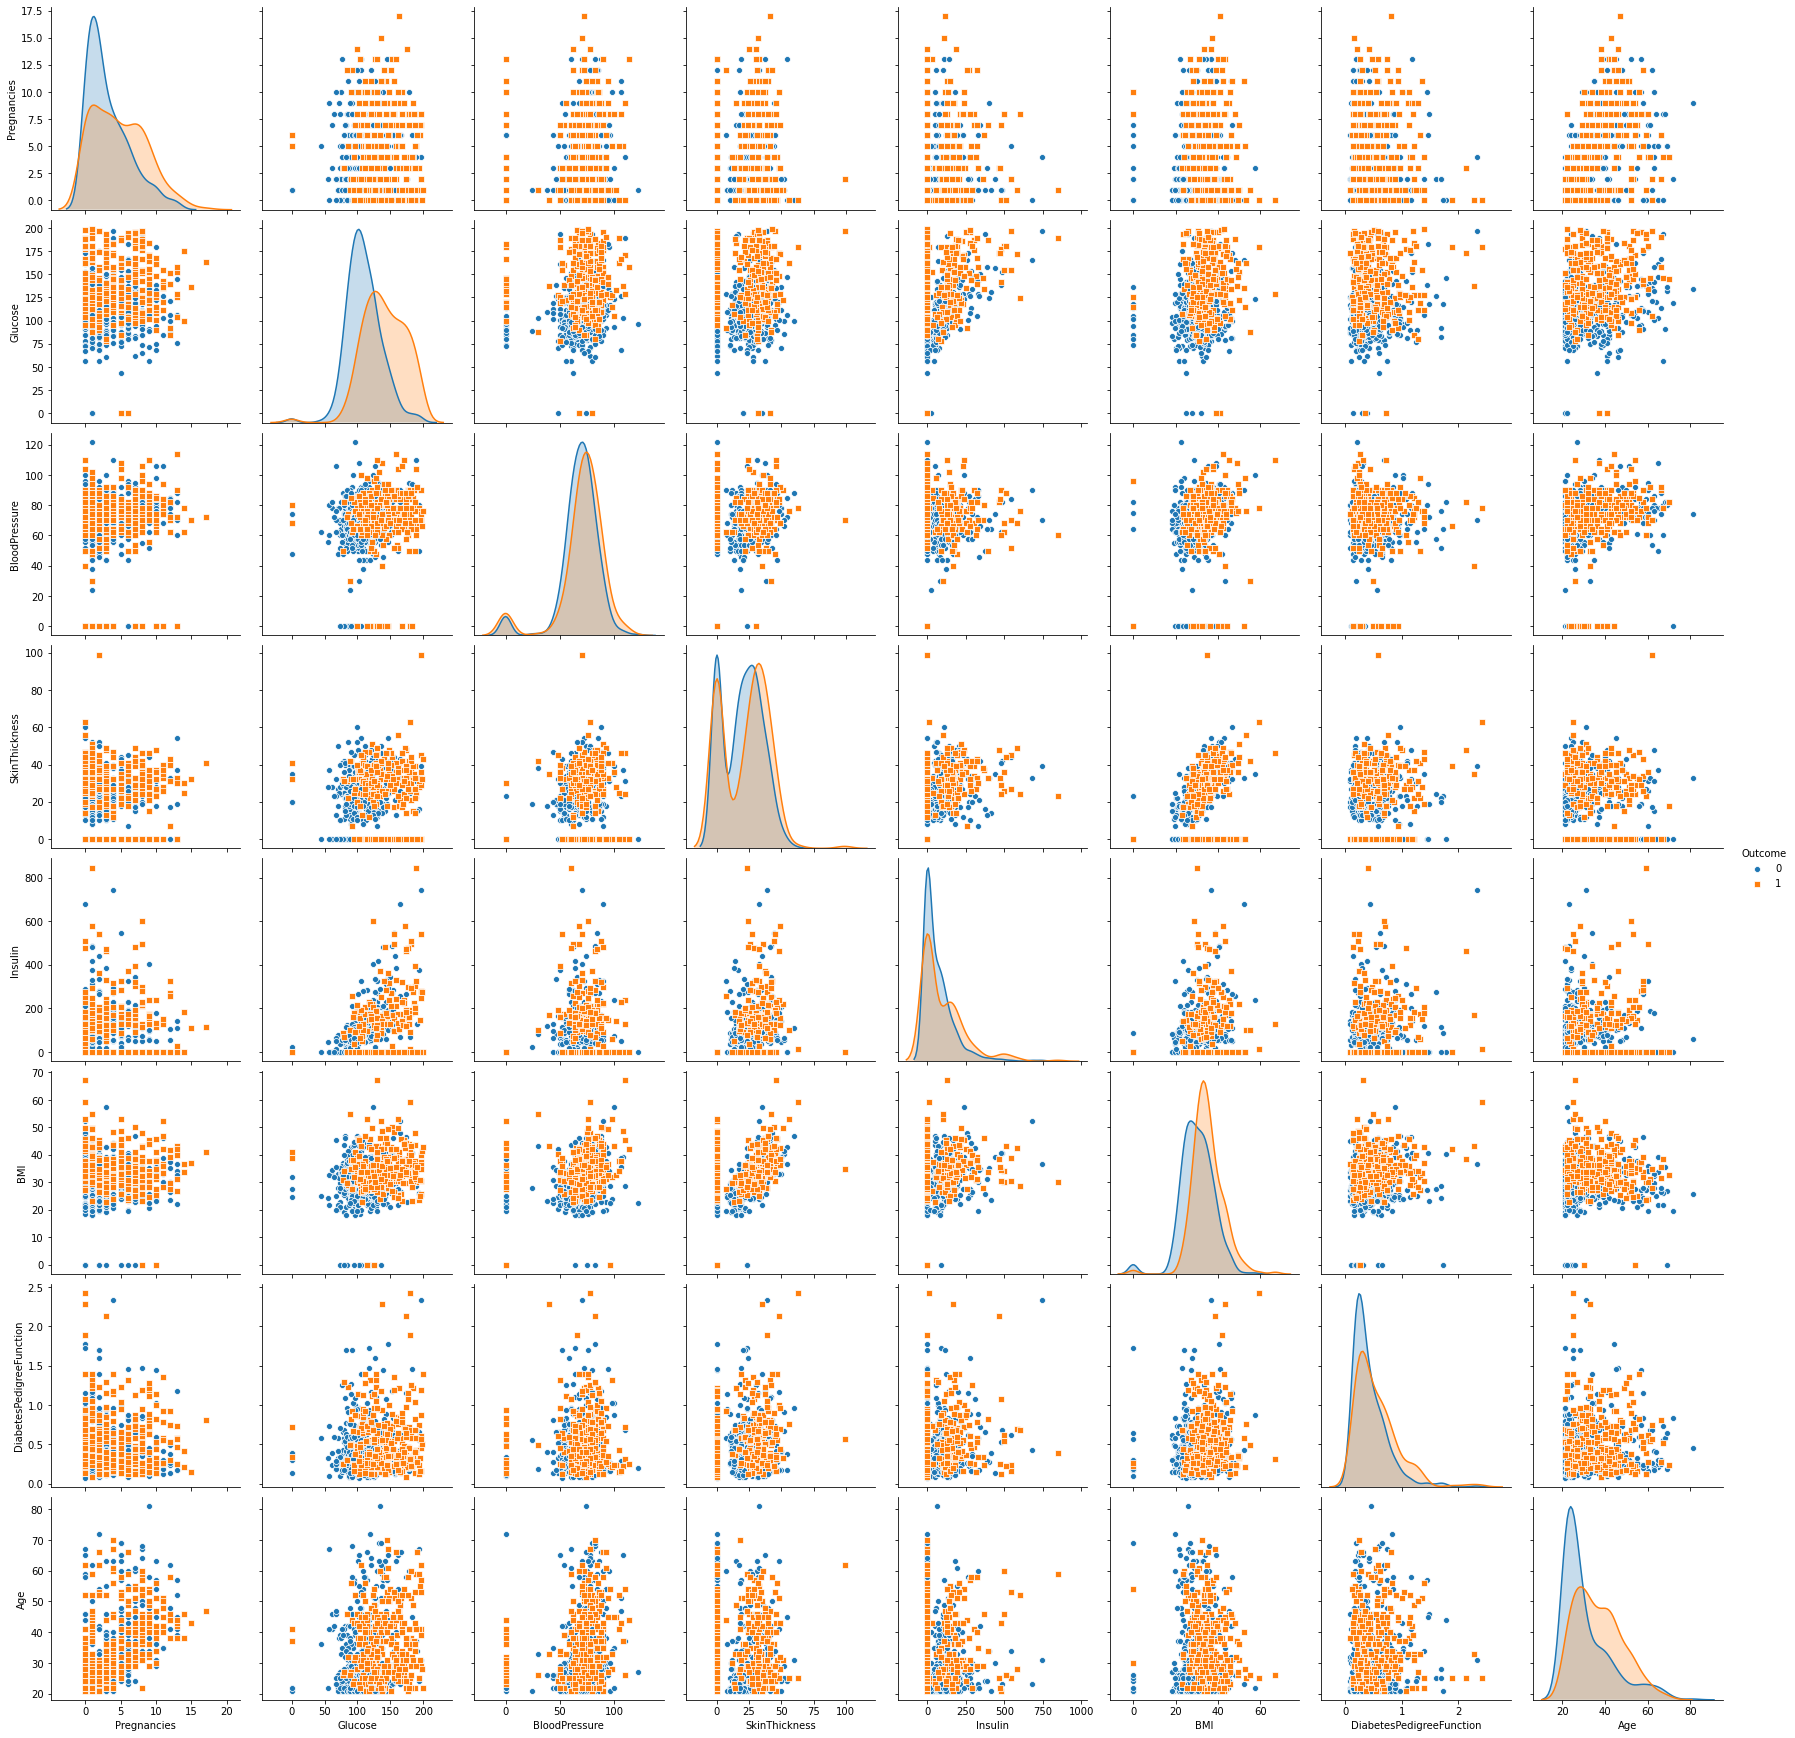

In [52]:
plt.figure(figsize=[10, 7])
# I want to see the effect of all attribute in this table which lead to the diabetes
sns.pairplot(data=diabetes, hue='Outcome', height=3, markers=['o', 's'])
# No need to drop anything
# sns.pairplot(diabetes.drop('Age', axis=1), hue ='Outcome', height=3, markers=['o', 's'])



#### **Boxplots**

C:\Users\16526\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\16526\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\16526\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\16526\miniconda3\lib\site-packages\pandas\plotting\_m

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000297CB49E548>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

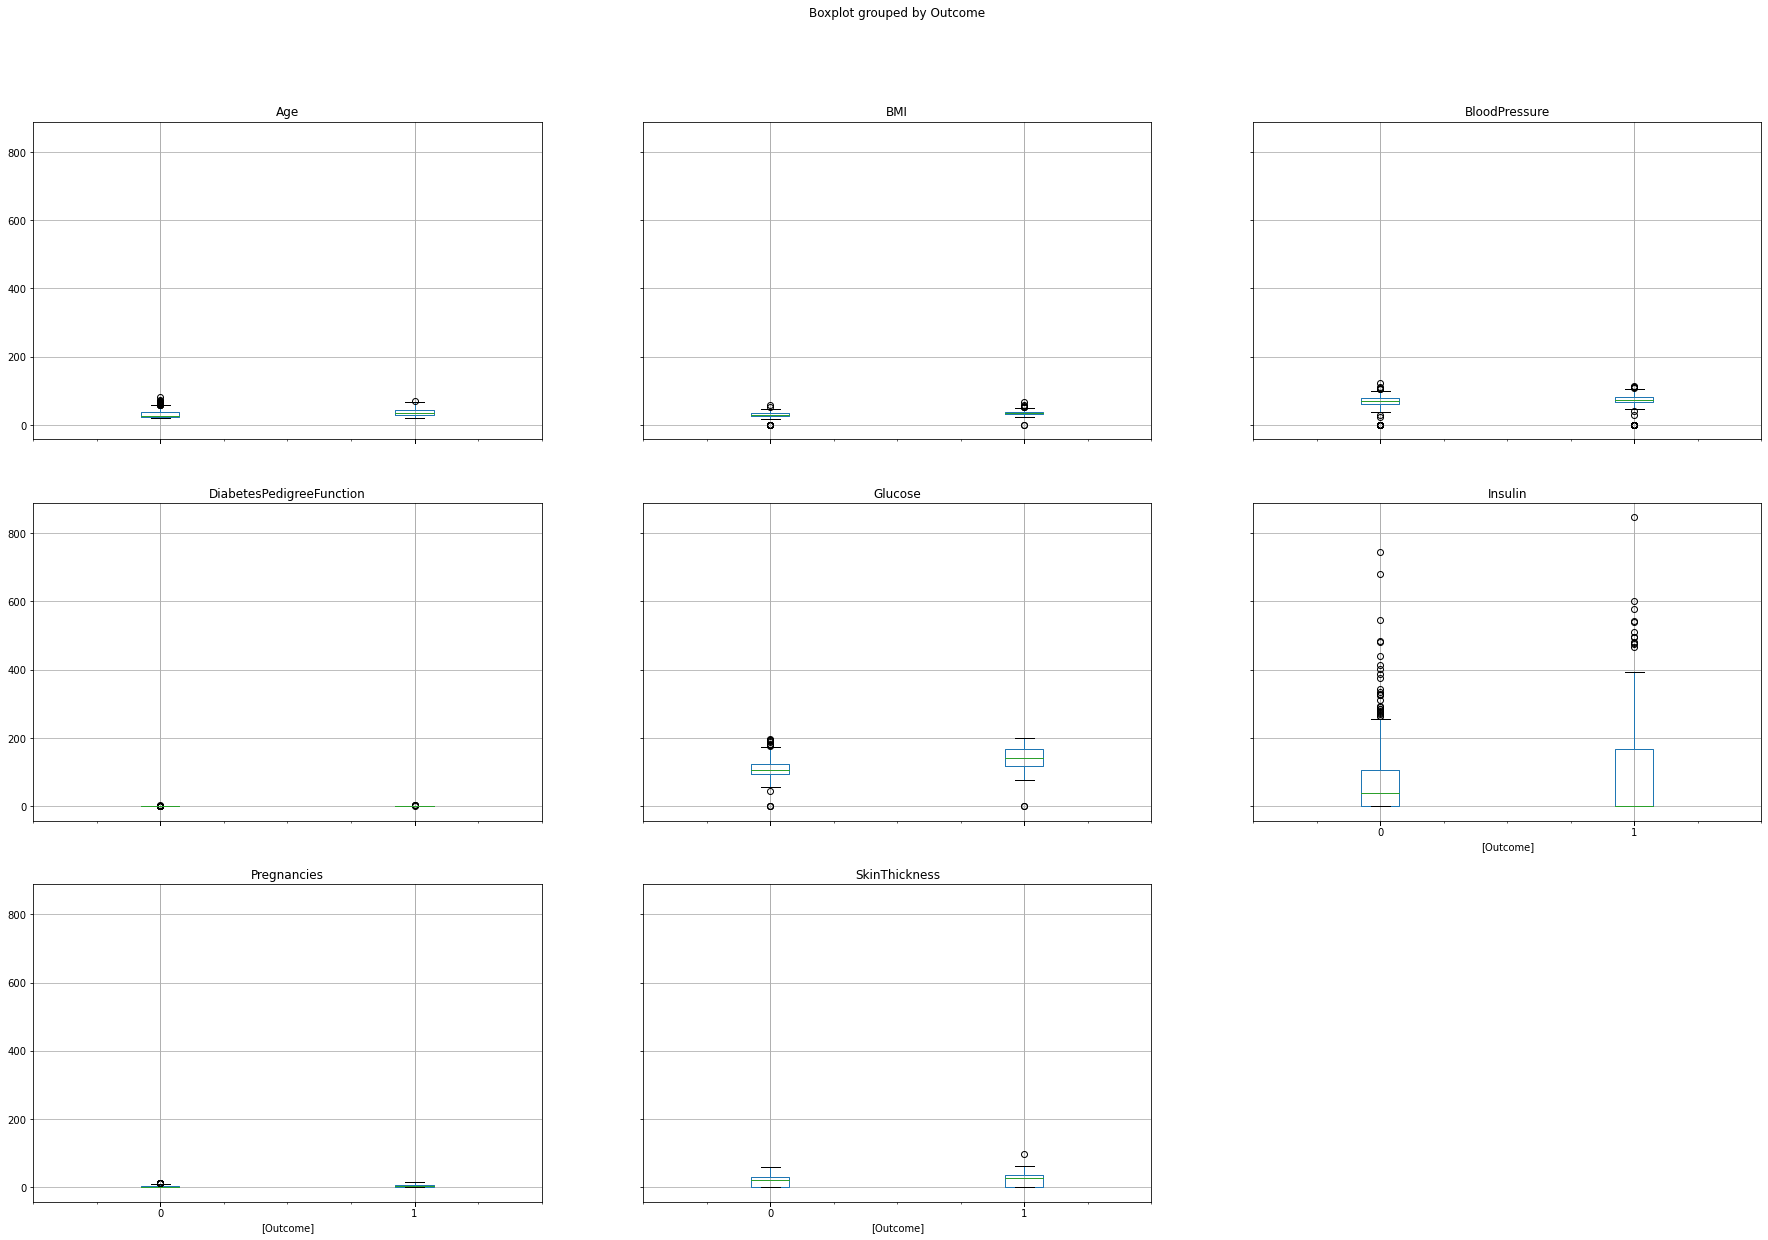

In [53]:
plt.figure()
diabetes.boxplot(by='Outcome', figsize=(30, 20))

### 2. Data preprocessing 

#### **Define Features and Label**

In [54]:
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes[feature_columns].values
y = diabetes['Outcome'].values 

y[0:5]

array([1, 0, 1, 0, 1], dtype=int64)

##### **Encoding** (not need in this case; do it because we are in practice mode)

In [55]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

##### **Splitting datasest into training set and test set**

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [57]:
X_train.shape

(614, 8)

In [58]:
y_train.shape

(614,)

In [59]:
X_test.shape

(154, 8)

In [60]:
y_test.shape

(154,)

### 3. Using KMM for classification

##### **Create model**

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

###### **Find the best k value**

In [62]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

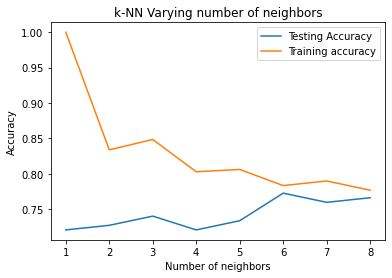

In [63]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### k-Fold Cross-Validation

In [64]:
knn_cv = KNeighborsClassifier(n_neighbors=3)#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.68181818 0.69480519 0.75324675 0.75163399 0.68627451]
cv_scores mean:0.7135557253204311


The train-test-split method we used in earlier is called ‘holdout’. 
Cross-validation is better than using the holdout method because the holdout method score is dependent on how the data is split into train and test sets
Cross-validation gives the model an opportunity to test on multiple splits so we can get a better idea on how the model will perform on unseen data.

### Hypertuning model parameters using GridSearchCV

GridSearchCV works by training our model multiple times on a range of parameters that we specify. That way, we can test our model with each parameter and figure out the optimal values to get the best accuracy results.
we will create a dictionary, setting ‘n_neighbors’ as the key and using numpy to create an array of values from 1 to 24.

In [65]:
from sklearn.model_selection import GridSearchCV#create new a knn model
knn2 = KNeighborsClassifier()#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)#fit model to data
knn_gscv.fit(X, y)
#check top performing n_neighbors value
print(knn_gscv.best_params_)
#check mean score for the top performing value of n_neighbors
print(knn_gscv.best_score_)

{'n_neighbors': 14}
0.7578558696205755


##### **Choose k = 14 ?**

In [66]:
# Create model (k = 14)
classifier = KNeighborsClassifier(n_neighbors=14)

# Fitting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

##### **Prediction**

In [67]:
# Predicting on the test set
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

##### **Evaluating the model for the test set**

In [68]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[91,  8],
       [27, 28]], dtype=int64)

##### **Accuracy**

##### **Method 1:**

In [69]:
#Using accuracy_score
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 77.27 %.


##### **Method 2:**

In [70]:
def sumAll(confusionMatrix):
    return sum(sum(confusionMatrix.tolist(), []))
    
def sumMainDiagonal(confusionMatrix):
    return sum(confusionMatrix[i][i] for i in range(len(confusionMatrix)))

sumAll(cm)
sumMainDiagonal(cm)
accuracy_byhand = sumMainDiagonal(cm) / sumAll(cm)

accuracy_byhand * 100

77.27272727272727

##### **Method 3:**

In [71]:
knn.score(X_test, y_test)

0.7662337662337663

In [72]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [73]:
knn.predict(X_test)[0:5]

array([1, 0, 0, 0, 0], dtype=int64)